In [17]:
import pandas as pd
from collections import defaultdict
import string
from nltk.corpus import stopwords
import numpy as np 
import seaborn as sns
import nltk.data
from matplotlib import pyplot as plt   
from nltk.corpus import stopwords
from collections import Counter

In [18]:
data = pd.read_csv("disaster-tweets.csv",encoding='latin1')
data = data.drop(["_unit_id","_golden","_unit_state","_trusted_judgments","_last_judgment_at","choose_one_gold","choose_one:confidence","keyword","location","tweetid","userid"], axis=1) 
data.columns = ['target','text']
data = data[data["target"]!="Can't Decide"]
data.head()

,target,text
0,Relevant,Just happened a terrible car crash
1,Relevant,Our Deeds are the Reason of this #earthquake M...
2,Relevant,"Heard about #earthquake is different cities, s..."
3,Relevant,"there is a forest fire at spot pond, geese are..."
4,Relevant,Forest fire near La Ronge Sask. Canada


In [19]:
print('There are {} rows and {} columns in the data table'.format(data.shape[0],data.shape[1]))

There are 10860 rows and 2 columns in the data table


# Class distribution

While in the only train dataset we had more exaples in the Relevant tweets class, here we have a different situation and we have more tweets that are labeled as non-relevant.

Text(0, 0.5, 'samples')

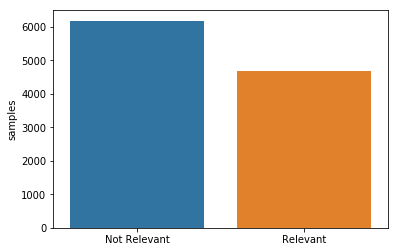

In [20]:
x = data.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

# Number of characters in tweets


The following plots show the distribution of character numbers in tweets which is similar for both classes. Most common tweet length is 12-140 characters in a tweet.


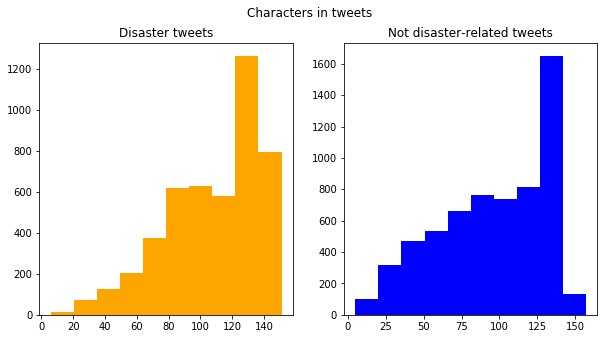

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['target']=='Relevant']['text'].str.len()
ax1.hist(tweet_len,color='orange')
ax1.set_title('Disaster tweets')
tweet_len=data[data['target']=='Not Relevant']['text'].str.len()
ax2.hist(tweet_len,color='blue')
ax2.set_title('Not disaster-related tweets')
fig.suptitle('Characters in tweets')
plt.show()

# Number of words in a tweet


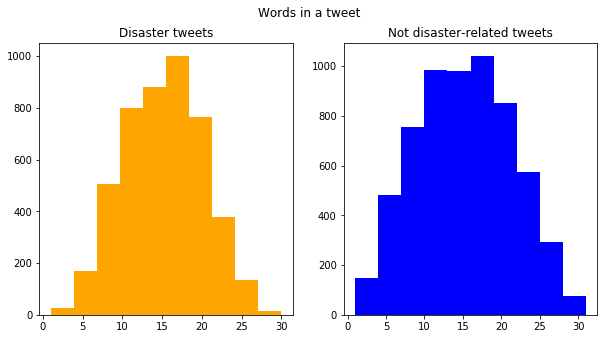

In [22]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = data[data['target']=='Relevant']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='orange')
ax1.set_title('Disaster tweets')
tweet_len=data[data['target']=='Not Relevant']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='blue')
ax2.set_title('Not disaster-related tweets')
fig.suptitle('Words in a tweet')
plt.show()

# Average word length in a tweet

Text(0.5, 0.98, 'Average word length tweets')

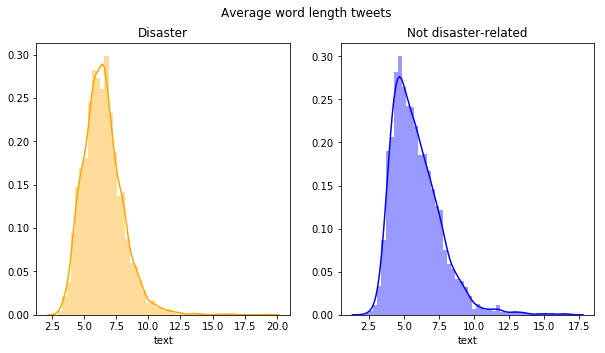

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=data[data['target']=='Relevant']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='orange')
ax1.set_title('Disaster')
word=data[data['target']=='Not Relevant']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Not disaster-related')
fig.suptitle('Average word length tweets')

# Most common stopwords


In [24]:
def create_corpus(target):
    corpus=[] 
    for x in data[data['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus
stopwords = stopwords = nltk.corpus.stopwords.words("english")

First, stopwords distribution of the Not-disaster relevant class

In [25]:
corpus=create_corpus('Not Relevant')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x1,y1=zip(*top)
#plt.bar(x,y)

Then, stopwords distribution for the disaster class

In [26]:
corpus=create_corpus('Relevant')
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x2,y2=zip(*top)
#plt.bar(x,y)

There are more stopwords in the Not disaster related class

<BarContainer object of 10 artists>

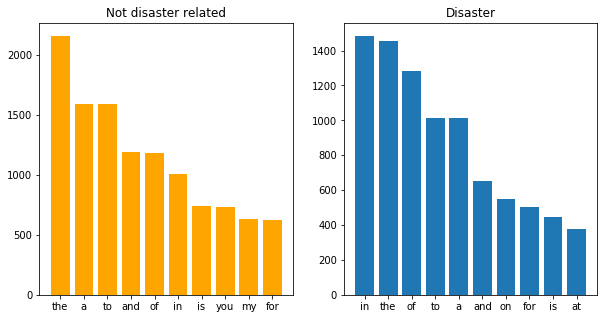

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title('Not disaster related')
ax2.set_title('Disaster')
ax1.bar(x1, y1,color='orange')
ax2.bar(x2, y2)

# Punctuation distribution

Distribution for Relevant class

In [31]:
corpus=create_corpus('Relevant')
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x1,y1=zip(*dic.items())

Distribution for non relevant class

In [32]:
corpus=create_corpus('Not Relevant')
dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1   
x2,y2=zip(*dic.items())

<BarContainer object of 21 artists>

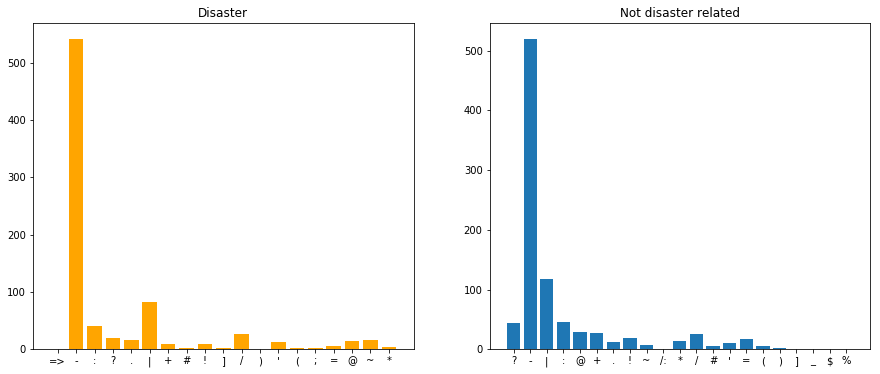

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.set_title('Disaster')
ax2.set_title('Not disaster related')
ax1.bar(x1, y1,color='orange')
ax2.bar(x2, y2)